# <center><b> <em> Feature Engineering </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [342]:
# Définir une fonction de conversion pour la colonne datetime
def parse_datetime(date_string):
    return pd.to_datetime(date_string)

# Spécifier les types de données et les convertisseurs
dtype = {'invoice': str, 'object': int, 'stock_code': object, 'description': object, 'quantity': int, 'unit_price': float, 'customer_id': object, 'country': object}
converters = {'invoice_date': parse_datetime}

# Charger le fichier CSV en utilisant les types de données et les convertisseurs
data = pd.read_csv("../data/silver.csv", dtype=dtype, converters=converters)

In [316]:
data.tail()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
1033031,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1033032,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1033033,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1033034,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1033035,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [317]:
data.describe()

,quantity,unit_price
count,1.033036e+06,1.033036e+06
mean,1.007688e+01,4.613980e+00
std,1.751976e+02,1.223975e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


    *Df NON cancelled (Pour calculer le chiffre d'affaire)

In [343]:
df_non_cancelled = data[~data["invoice"].str.contains("C", na=False)]
df_non_cancelled.head(6)

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom


In [344]:
df_non_cancelled["total_price"] = df_non_cancelled["quantity"] * df_non_cancelled["unit_price"]

/tmp/ipykernel_59669/3306562199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_cancelled["total_price"] = df_non_cancelled["quantity"] * df_non_cancelled["unit_price"]


In [347]:
df_non_cancelled['year'] = df_non_cancelled['invoice_date'].dt.year

/tmp/ipykernel_59669/2214827598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_cancelled['year'] = df_non_cancelled['invoice_date'].dt.year


In [348]:
df_non_cancelled

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009
...,...,...,...,...,...,...,...,...,...,...
1033031,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011
1033032,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
1033033,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
1033034,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011


In [349]:
df_2010 = df_non_cancelled[df_non_cancelled['year'] == 2010]
df_2011 = df_non_cancelled[df_non_cancelled['year'] == 2011]

In [350]:
chiffre_affaires_2010 = (df_2010['total_price']).sum()
chiffre_affaires_2011 = (df_2011['total_price']).sum()

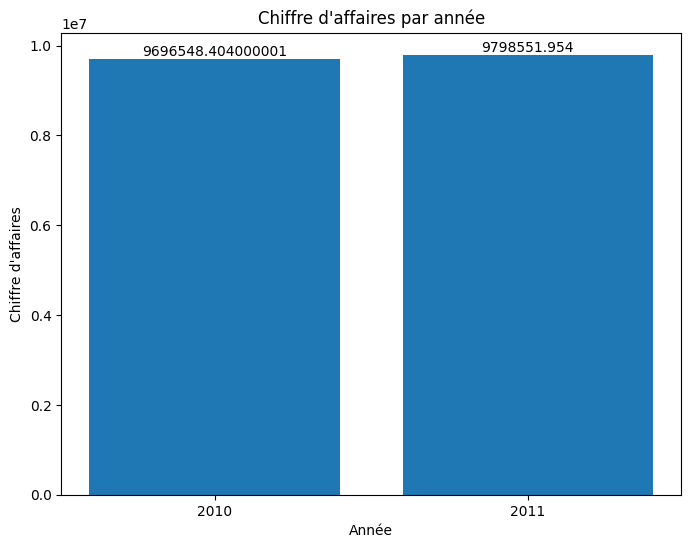

In [354]:

years = ['2010', '2011']
chiffre_affaires = [chiffre_affaires_2010, chiffre_affaires_2011]

# Créer une nouvelle figure avec une taille personnalisée
plt.figure(figsize=(8, 6))

plt.bar(years, chiffre_affaires)
plt.title("Chiffre d'affaires par année")
plt.xlabel("Année")
plt.ylabel("Chiffre d'affaires")

for i, chiffre in enumerate(chiffre_affaires):
    plt.text(i, chiffre, str(chiffre), ha='center', va='bottom')

plt.show()

## <font color="green"> || - Ajout column Total Price </font>

In [318]:
data["total_price"] = data["quantity"] * data["unit_price"]

In [319]:
data.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


    * Enlever les clients TEST

In [320]:
data = data[(data['stock_code'] != 'TEST001') & (data['stock_code'] != 'D') & (data['stock_code'] != 'M')]

## <font color="green"> ||| - RFM Analysis </font>

La métrique RFM (Récence, Fréquence, Montant) est une méthode d'analyse utilisée dans le domaine du marketing et de la gestion de la relation client. Elle permet de segmenter et d'évaluer la valeur des clients en fonction de trois critères principaux :

    * Récence (Recency) : Cette mesure évalue depuis combien de temps un client n'a pas effectué d'activité ou d'achat. Plus la récence est faible, c'est-à-dire plus le client a interagi récemment avec l'entreprise, plus il est considéré comme actif et potentiellement précieux.

    * Fréquence (Frequency) : Cette mesure évalue la fréquence à laquelle un client effectue des activités ou des achats. Les clients qui interagissent plus souvent avec l'entreprise sont généralement considérés comme plus engagés et fidèles.

    * Montant (Monetary) : Cette mesure évalue la valeur monétaire des activités ou des achats effectués par un client. Elle prend en compte le montant total dépensé par le client sur une période donnée. Les clients qui dépensent davantage sont souvent considérés comme plus précieux pour l'entreprise.

En combinant ces trois mesures, on peut créer des segments de clients plus pertinents et ciblés. Par exemple, un segment "VIP" pourrait être composé de clients récents, fréquents et à haut montant, tandis qu'un segment "à réactiver" pourrait inclure des clients moins actifs sur une longue période.

La métrique RFM permet aux entreprises de mieux comprendre le comportement et la valeur de leurs clients, ce qui leur permet de personnaliser leurs stratégies de marketing, de fidélisation et de service client. Elle est souvent utilisée en conjonction avec des techniques de segmentation et d'analyse de données pour prendre des décisions plus éclairées et optimiser les efforts de marketing et de gestion de la relation client.

## <font color="purple"> 
 - <b> Recency </b> : the number of days between today_date and the last purchase date of this customer  

 - <b> Frequency </b> : the number of purchase of this customer  

 - <b> Monetary </b> : sum of TotalPrice of this customer 

 
 </font>


In [321]:
today_date = dt.datetime(2011, 12, 11)

In [322]:
RFM_data = data.groupby("customer_id").agg({"invoice_date": lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     "invoice": lambda x: x.astype(str)[~x.astype(str).str.startswith('C')].nunique(),
                                     "total_price": lambda TotalPrice: TotalPrice.sum()})
RFM_data.columns = ["recency", "frequency", "monetary"]


RFM_data.head(10)

,recency,frequency,monetary
customer_id,,,
12346.0,326,4,66.86
12347.0,3,8,4921.53
12348.0,76,5,2019.40
12349.0,19,4,4404.54
12350.0,311,1,334.40
12351.0,376,1,300.93
12352.0,37,9,1889.21
12353.0,205,2,406.76
12354.0,233,1,1079.40


In [323]:
RFM_data.head()

,recency,frequency,monetary
customer_id,,,
12346.0,326,4,66.86
12347.0,3,8,4921.53
12348.0,76,5,2019.40
12349.0,19,4,4404.54
12350.0,311,1,334.40


In [324]:
df_cancelled = data[data["invoice"].str.contains("C", na=False)]
df_cancelled.head(6)

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,-15.0


In [325]:
df_churn_custmer = data.groupby("customer_id").agg({
    "total_price": [
        lambda x: x[x > 0].sum(),
        lambda x: x[x < 0].sum(),
        lambda x: abs(x[x < 0].sum() * 100 / x[x > 0].sum())
    ]
})

df_churn_custmer.columns = ['payed_amount', 'refund_amount', 'pourcentage']
df_churn_custmer = df_churn_custmer.reset_index()

/tmp/ipykernel_59669/680403623.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  lambda x: abs(x[x < 0].sum() * 100 / x[x > 0].sum())
/tmp/ipykernel_59669/680403623.py:5: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: abs(x[x < 0].sum() * 100 / x[x > 0].sum())


In [326]:
df_churn_custmer.head(10)

,customer_id,payed_amount,refund_amount,pourcentage
0,12346.0,77353.96,-77287.10,99.913566
1,12347.0,4921.53,0.00,0.000000
2,12348.0,2019.40,0.00,0.000000
3,12349.0,4428.69,-24.15,0.545308
4,12350.0,334.40,0.00,0.000000
5,12351.0,300.93,0.00,0.000000
6,12352.0,2009.54,-120.33,5.987938
7,12353.0,406.76,0.00,0.000000
8,12354.0,1079.40,0.00,0.000000
9,12355.0,947.61,0.00,0.000000


In [327]:
rfm_data =pd.merge(RFM_data, df_churn_custmer, on='customer_id')

In [328]:
rfm_data.head()

,customer_id,recency,frequency,monetary,payed_amount,refund_amount,pourcentage
0,12346.0,326,4,66.86,77353.96,-77287.10,99.913566
1,12347.0,3,8,4921.53,4921.53,0.00,0.000000
2,12348.0,76,5,2019.40,2019.40,0.00,0.000000
3,12349.0,19,4,4404.54,4428.69,-24.15,0.545308
4,12350.0,311,1,334.40,334.40,0.00,0.000000


In [329]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5899 entries, 0 to 5898
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    5899 non-null   object 
 1   recency        5899 non-null   int64  
 2   frequency      5899 non-null   int64  
 3   monetary       5899 non-null   float64
 4   payed_amount   5899 non-null   float64
 5   refund_amount  5899 non-null   float64
 6   pourcentage    5898 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 368.7+ KB


In [330]:
rfm_data = rfm_data[['customer_id' , 'recency', 'frequency' , 'monetary', 'pourcentage']]

#### Ajout du colonne basket_average

In [331]:
rfm_data['basket_average'] = rfm_data['monetary'] / rfm_data['frequency']

In [332]:
rfm_data.head()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
0,12346.0,326,4,66.86,99.913566,16.71500
1,12347.0,3,8,4921.53,0.000000,615.19125
2,12348.0,76,5,2019.40,0.000000,403.88000
3,12349.0,19,4,4404.54,0.545308,1101.13500
4,12350.0,311,1,334.40,0.000000,334.40000


    * Data num & catég for analyse

In [333]:
unique_customers = data[['customer_id', 'country']].drop_duplicates()

In [334]:
unique_customers.shape

(5927, 2)

In [335]:
mixed_data = pd.merge(rfm_data,unique_customers , on='customer_id')

In [336]:
mixed_data.head()

,customer_id,recency,frequency,monetary,pourcentage,basket_average,country
0,12346.0,326,4,66.86,99.913566,16.71500,United Kingdom
1,12347.0,3,8,4921.53,0.000000,615.19125,Iceland
2,12348.0,76,5,2019.40,0.000000,403.88000,Finland
3,12349.0,19,4,4404.54,0.545308,1101.13500,Italy
4,12350.0,311,1,334.40,0.000000,334.40000,Norway


## <font color="green"> V - Export Data </font>

In [337]:
#EXporter la data dans un Csv 
df_churn_custmer.to_csv('../data/df_churn_custmer.csv', index=False)

In [338]:
#EXporter la data dans un Csv 
rfm_data.to_csv('../data/rfm.csv', index=False)

In [339]:
#EXporter la data dans un Csv 
mixed_data.to_csv('../data/mixed_data.csv', index=False)